Validation of Company_websites in Dataset

In [ ]:
import concurrent.futures
from multiprocessing.dummy import Pool as ThreadPool
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36.',
# # "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",}

def validate(index, row):    
    try:        
        response = requests.get(row['website'], headers=headers , timeout=3)
        if response.elapsed.total_seconds() > 3:
            df.loc[index, 'invalid_pages'] = 'The response is taking too long'
        elif response.status_code <= 400 or response.status_code == "":
            df.loc[index, 'validated_link'] = row["website"]
        else:
            df.loc[index, 'invalid_pages']= response.status_code
    except:
      df.loc[index, 'invalid_pages'] = "invalid page"


df = pd.read_csv('./companies.csv').fillna("")
df['validated_link'] = ''
df['invalid_pages'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index,row in df.iterrows():
        executor.submit(validate, index, row)


df.to_csv('./bior_companies.csv', index=False, encoding='utf8')

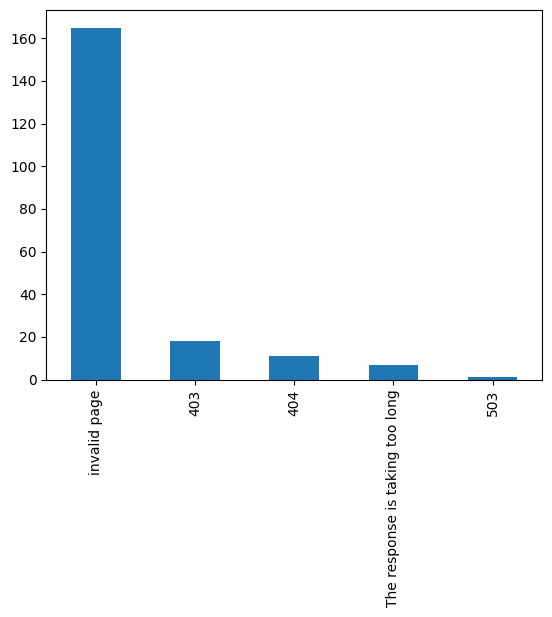

In [20]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("./bior_companies.csv", encoding='utf8')

# df = df.dropna().all
df_column = df['invalid_pages']

# Calculate the frequency of each value in the column

df_freq = df_column.value_counts()

# Plot the histogram

df_freq.plot(kind='bar')

plt.show()

Top 25 terms in Dataset for further scraping of Career pages

['careers', 'contact us', 'vacancies']


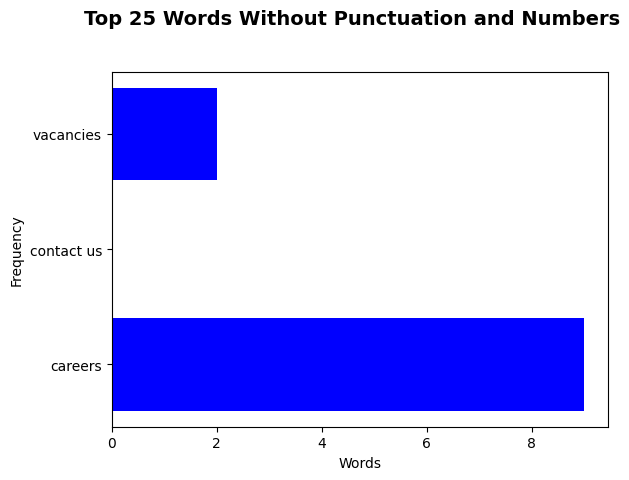

In [22]:
import pandas as pd

company_website = pd.read_csv('./bior_companies.csv').fillna("")

website_list = company_website['validated_link'].tolist()

split_website_list = [i.split('/')[-1] for i in website_list]

top_25 = sorted(set(split_website_list), key=split_website_list.count, reverse=True)[:24]

top_25 = [i for i in top_25 if i != '' and "." not in i]
top_25 = [i for i in top_25 if len(i)>4]
top_25 = [i.replace('-', ' ').replace('#', '') for i in top_25]

print(top_25)
fig = plt.figure()
fig.suptitle('Top 25 Words Without Punctuation and Numbers', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')

ax.barh(top_25, [split_website_list.count(i) for i in top_25], color = 'blue')

plt.show()



Scraping Career Pages

In [23]:
# %pip install -U ipykernel
import concurrent.futures
from multiprocessing.dummy import Pool as ThreadPool
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36.',
# # "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",}

def scrape(index, row):
    try:
        response = requests.get(row['validated_link'], headers=headers , timeout=3)
        # if response.elapsed.total_seconds() > 3:
        #     print('The response is taking too long')
        # elif response.status_code <= 400 or response.status_code == "":
        html = BeautifulSoup(response.content, 'html.parser')
        for link in html.find_all('a'):
            for term in terms:
                if term in row['validated_link']:
                    df.loc[index, 'career_pages'] = row['validated_link']
                elif term in link.text.lower():

                    df.loc[index, 'career_pages'] = link['href'].replace('///','/')
                # else:
                #     df.loc[index, 'career_pages'] = row["validated_link"]
    
    except:
        pass


df = pd.read_csv('./bior_companies.csv', encoding='utf-8').fillna("")
terms = [ 'careers', 'career','work with us', 'work for us','vacancies','employment', 'join us', 'join the team',  'join our team', 'employment', 'recruitment', 'jobs' ]
df['career_pages'] = ''
# df['career_errors'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index, row in df.iterrows():
        executor.submit(scrape, index, row)

filter_terms =  ["javascript", "bit.ly", "mailto", "linkedin", "facebook","instagram"]
for url in df["career_pages"]:
    for x in filter_terms:
        if x in url: 
             url = ''
df.to_csv('./bior_companies2.csv', index=False, encoding='utf8')

Validating Careers pages

In [24]:
import concurrent.futures
from multiprocessing.dummy import Pool as ThreadPool
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36.',
# # "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",}

def validate(index, row):
    try:
        # if row['career_pages'] != "": 
        response = requests.get(row['career_pages'], headers=headers , timeout=3)
        if response.status_code <= 400:
            df.loc[index, 'validated_career_pages'] = row['career_pages']
            
               
    except:
        if row['career_pages'] != "":
                        
            df.loc[index, 'validated_career_pages'] = df.loc[index, 'company_website'] + df.loc[index,'career_pages']
            print(df.loc[index, 'validated_career_pages']) 


df = pd.read_csv('./bior_companies2.csv').fillna("")
df['validated_career_pages'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index, row in df.iterrows():
        executor.submit(validate, index, row)


df.to_csv('./bior_companies3.csv', index=False, encoding='utf8')

Top 50 terms career pages 

['careers', 'vacancies', 'work with us', '927642023929319?sk=info', 'warner bros jobs', 'careers at somfy', 'Job Vacancies', 'employment law round up', '?page_id=13', 'job vacancies', '?utm_source=Splash%20Page&utm_medium=splashpage&utm_campaign=splash page&utm_term=Splash%20Careers&utm_content=splash careers', '?page_id=28086', 'join us', 'fair recruitment policy', 'en?s_o=Site%20TootbusCorporate', 'ventro careers', 'employment', 'jobs boost as x cel group secures major new contract', 'applicants', 'careers at usborne', 'careers recruitment', 'search', 'truepill', 'employment opportunities']


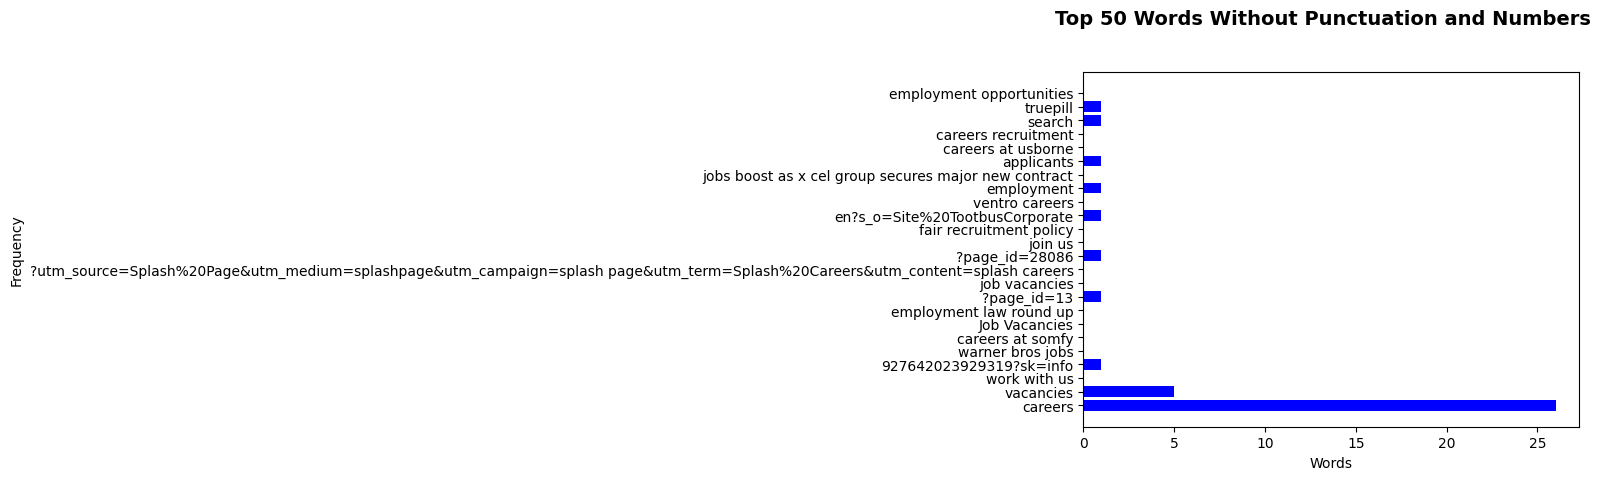

In [25]:
import pandas as pd

company_website = pd.read_csv('./bior_companies3.csv').fillna("")

website_list = company_website['validated_career_pages'].tolist()

split_website_list = [i.split('/')[-1] for i in website_list]

top_50 = sorted(set(split_website_list), key=split_website_list.count, reverse=True)[:50]

top_50 = [i for i in top_50 if i != '' and "." not in i]
top_50 = [i for i in top_50 if len(i)>4]
top_50 = [i.replace('-', ' ').replace('#', ' ') for i in top_50]

print(top_50)
fig = plt.figure()
fig.suptitle('Top 50 Words Without Punctuation and Numbers', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')

ax.barh(top_50, [split_website_list.count(i) for i in top_50], color = 'blue')

plt.show()


Skipping exising job list pages and further scraping job list pages

In [26]:
import concurrent.futures
from multiprocessing.dummy import Pool as ThreadPool
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36.',
# # "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
#     "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",}

def scrape(index, row):
    try:
        response = requests.get(row['validated_career_pages'], headers=headers , timeout=3)
        # if response.elapsed.total_seconds() > 3:
        #     print('The response is taking too long')
        # elif response.status_code <= 400 or response.status_code == "":
        html = BeautifulSoup(response.content, 'html.parser')
        for link in html.find_all('a'):
            for term in terms:
                if term in row['validated_career_pages']:
                    df.loc[index, 'job_pages'] = row['validated_career_pages']
                elif term in link.text.lower():

                    df.loc[index, 'job_pages'] = link['href']
                # else:
                #     df.loc[index, 'career_pages'] = row["validated_link"]
    
    except:
        pass


df = pd.read_csv('./bior_companies3.csv', encoding='utf-8').fillna("")
terms = ['jobs',  'job vacancies', 'vancancies', 'opportunities', 'search jobs', 'search vacancies', 'current', 'find jobs', 'find all',]
df['job_pages'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index, row in df.iterrows():
        executor.submit(scrape, index, row)

filter_terms =  ["javascript", "bit.ly", "mailto", "linkedin", "facebook","instagram", "void"]
for url in df["job_pages"]:
    for x in filter_terms:
        if x in url: 
             url = ''
df.to_csv('./bior_companies4.csv', index=False, encoding='utf8')

Validating Job list pages 

In [27]:
import concurrent.futures
from multiprocessing.dummy import Pool as ThreadPool
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36.',
# # "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
#     "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",}

def scrape(index, row):
    try:
        # if row['career_pages'] != "": 
        response = requests.get(row['job_pages'], headers=headers , timeout=3)
        if response.status_code <= 400:
            df.loc[index, 'validated_job_pages'] = row['job_pages']
            
               
    except:
        if row['job_pages'] != "":
            
            df.loc[index, 'validated_job_pages'] = df.loc[index, 'company_website'] + df.loc[index,'job_pages']
            print(df.loc[index, 'validated_job_pages']) 


df = pd.read_csv('./bior_companies4.csv').fillna("")
df['validated_job_pages'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index, row in df.iterrows():
        executor.submit(scrape, index, row)


df.to_csv('./bior_companies5.csv', index=False, encoding='utf8')

Combing existing job list pages and scraped job list pages

In [28]:
def scrape(index, row):
    try:
        # if row['career_pages'] != "": 
        response = requests.get(row['validated_job_pages'], headers=headers , timeout=3)
        if response.status_code <= 400:
            df.loc[index, 'final_pages'] = row['validated_job_pages']
            
               
    except:
        if row['validated_job_pages'] == "":
            
            df.loc[index, 'final_pages'] = df.loc[index, 'validated_career_pages'] 
            # print(df.loc[index, 'validated_job_pages']) 


df = pd.read_csv('./bior_companies5.csv').fillna("")
df['final_pages'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index, row in df.iterrows():
        executor.submit(scrape, index, row)


df.to_csv('./bior_companies6.csv', index=False, encoding='utf8')

Validation final pages with class count

Plot to see the overall scraped pages count

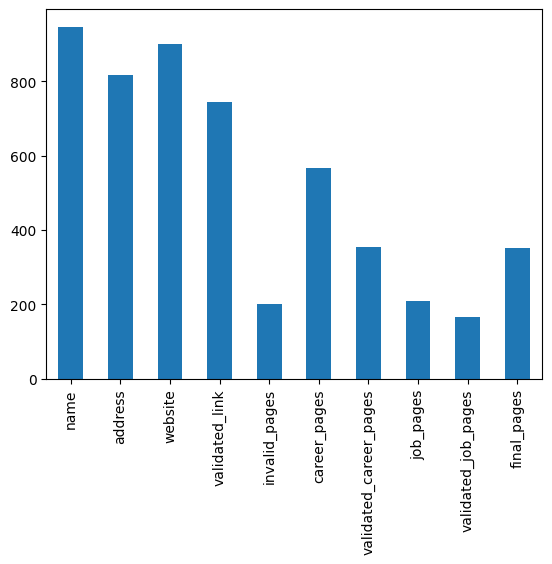

In [30]:
# %pip install matplotlib

import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("./bior_companies6.csv", encoding='utf8')

# df = df.dropna().all
plt.figure()

df.count(axis=0).plot(kind="bar")

plt.show()



Scraping text data, tags from job list pages for TextClassification

In [33]:
import concurrent.futures
from multiprocessing.dummy import Pool as ThreadPool
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36.',
# # "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",}

def scrape(index, row):
    try:
        # if row['career_pages'] != "": 
        response = requests.get(row['final_pages'], headers=headers , timeout=3)
        if response.status_code <= 400:
            soup = BeautifulSoup(response.content, "html.parser")
            body = soup.find('body')

            for tag in body.find_all(text=True):
                data = (str(tag))
                # data = [x.replace('\n', '') for x in data]
                # print(data)

                df.loc[index, 'data'] = " ".join(data.split()).replace('\n', '').replace('\t','')
            
               
    except:
        pass
    # if 'javascript' in (str(visible_text2)).text.lower():
        #     df.loc['data_error'] = "javascript"
            



df = pd.read_csv('./bior_companies6.csv').fillna("")
df['data'] = ''
df['data_error'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index, row in df.iterrows():
        executor.submit(scrape, index, row)


# df.to_csv('c://users//phani//desktop//bior_companies7.csv', index=False, encoding='utf8')

response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response

/usr/local/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>response code <Response [200]>

response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


response code <Response [200]>response code <Response [200]>

response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response code <Response [200]>
response